# Wave propagation Method (WPM)

In [1]:
from diffractio import sp, nm, plt, np, mm, degrees, um
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_fields_XZ import Scalar_field_XZ
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from diffractio.scalar_masks_X import Scalar_mask_X

from diffractio.utils_math import ndgrid

import matplotlib.cm as cm

## XZ Scheme

In [5]:
x0 = np.linspace(-500*um, 500*um, 1024*4)
z0 = np.linspace(-0.1 * mm, 1.25*mm, 1024*2)
wavelength = 25 * um

In [6]:
u0 = Scalar_source_X(x0, wavelength)
u0.plane_wave(A=1, theta=0 * degrees)

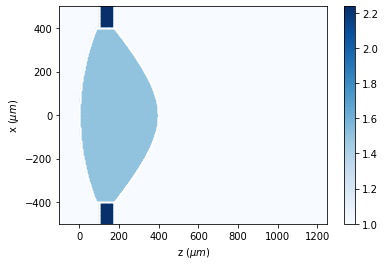

In [7]:
lens = Scalar_mask_XZ(x0, z0, wavelength, n_background=1, info='')
ipasa, conds= lens.aspheric_lens(r0=(0*mm,0*mm), angle=(0*degrees, (0*mm,0*mm)), 
                                   refraction_index=1.5, 
                                   cx=(1/(1*mm),-1/(.25*mm)),Qx=(0,0), 
                                   a2=(0,1e-13), a3=(0,0), a4=(0,0),
                                   depth=.4*mm,  size=0.8*mm)

lens.slit(r0=(0,100*um),
    aperture=800*um,
    depth=75*um,
    refraction_index=1+2j)


lens.draw_refraction_index(draw_borders=True, min_incr=0.01,colormap_kind=cm.Blues, colorbar_kind='vertical');

## WPM

In [2]:
x0 = np.linspace(-500*um, 500*um, 1024*4)
z0 = np.linspace(-0.1 * mm, 1.25*mm, 1024*2)
wavelength = 2 * um

In [3]:
u0 = Scalar_source_X(x0, wavelength)
u0.plane_wave(A=1, theta=0 * degrees)

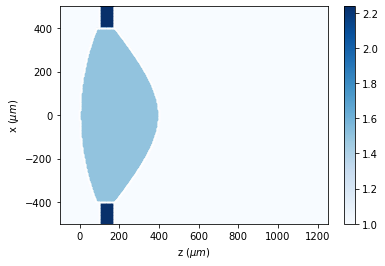

In [4]:
lens2 = Scalar_mask_XZ(x0, z0, wavelength, n_background=1, info='')
ipasa, conds= lens2.aspheric_lens(r0=(0*mm,0*mm), angle=(0*degrees, (0*mm,0*mm)), 
                                   refraction_index=1.5, 
                                   cx=(1/(1*mm),-1/(.25*mm)),Qx=(0,0), 
                                   a2=(0,1e-13), a3=(0,0), a4=(0,0),
                                   depth=.4*mm,  size=0.8*mm)

lens2.slit(r0=(0,100*um),
    aperture=800*um,
    depth=75*um,
    refraction_index=1+2j)


lens2.draw_refraction_index(draw_borders=True, min_incr=0.01,colormap_kind=cm.Blues, colorbar_kind='vertical');

In [5]:
# lens2.filter_refraction_index(type_filter=2, pixels_filtering=25);

In [6]:
lens2.incident_field(u0)

In [7]:
lens2.clear_field()
lens2.WPM(verbose=False)

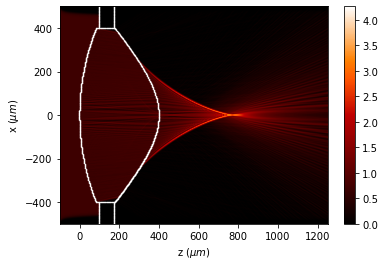

In [10]:
lens2.draw(kind='intensity',logarithm=1e0, normalize=None, draw_borders=True,
            colorbar_kind='vertical');

In [14]:
x_f_wpm,z_f_wpm = lens2.search_focus()

x = -0.122 um, z = 763.288 um


In [15]:
ylim_max=25*um
zlim_max=300*um

### Focusing area

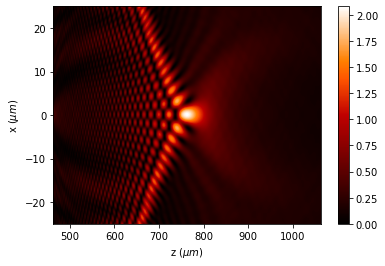

In [19]:
lens2.draw(kind='intensity',logarithm=1e-1,  colorbar_kind='vertical')
plt.ylim(-ylim_max,ylim_max)
plt.xlim(z_f_wpm-zlim_max,z_f_wpm+zlim_max);